La regresion lineal es utilizada en preguntas donde solo hay dos respuestas, se basa en probabilidades entre 0 y 1, genera una tabla con forma de S, el profesor da el ejemplo entre si en una imagen hay un perro o un gato, mientras sea menor que el 0.5 se considerara un gato, mientras si es mayor al 0.5 se considerara como un perro

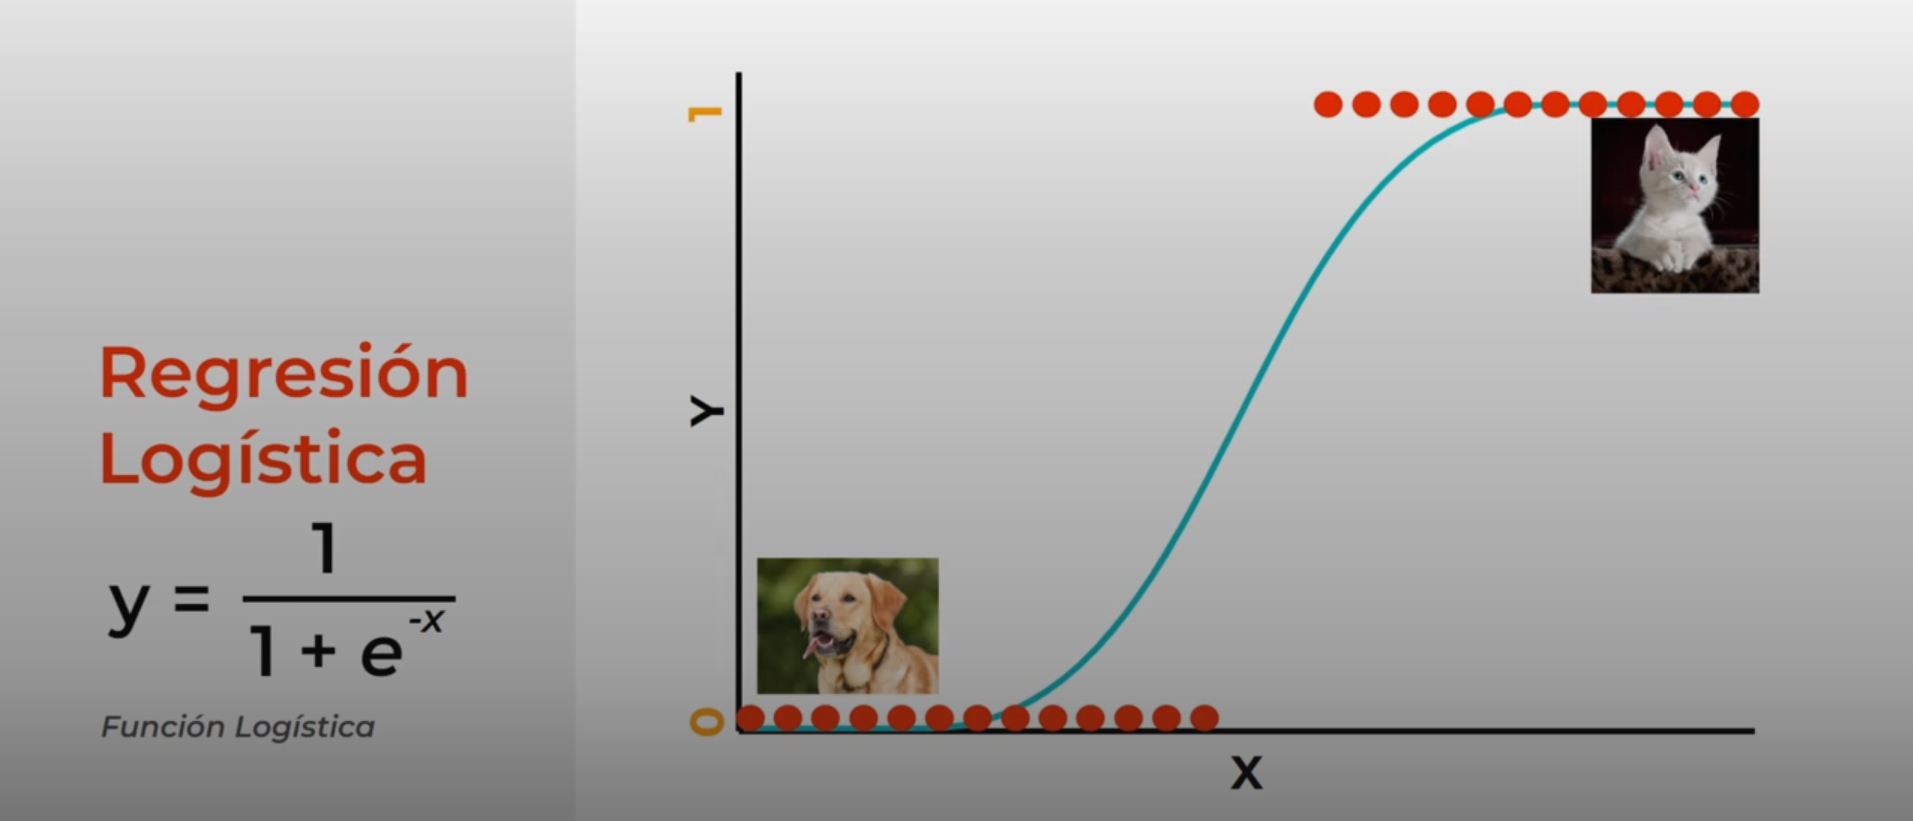

In [ ]:
import pandas as pd
import seaborn as sb
import sklearn.linear_model as sk
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
datas = pd.read_csv("U4_04_train.csv")

In [2]:
datas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

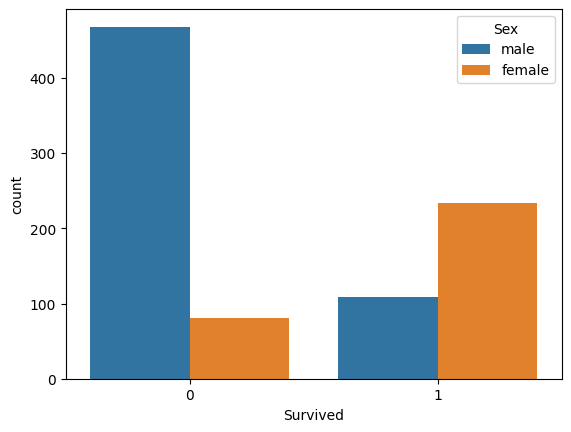

In [3]:
sb.countplot(x="Survived", data = datas, hue = "Sex")

In [4]:
datas.isna().sum()
#revisa si hay algun dato con una categoria nula, se quitara la categoria cabin y en age los nulos se les agregara el promedio

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


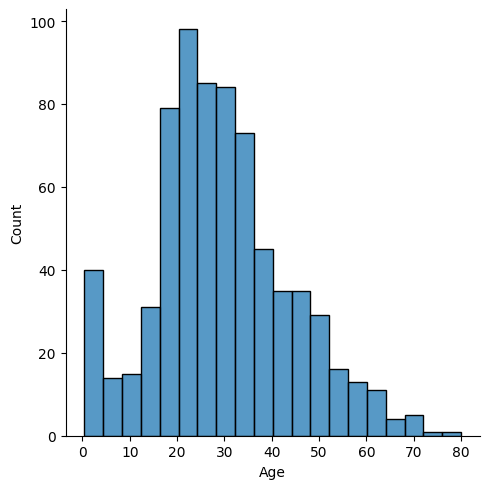

In [5]:
sb.displot(x="Age", data=datas)

In [39]:
datas.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681,0.350956,0.086614,0.724409
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [6]:
datas["Age"].mean() #el promedio
datas["Age"].fillna(datas["Age"].mean())
datas["Age"] = datas["Age"].fillna(datas["Age"].mean())

In [7]:
datas = datas.drop(["Cabin"], axis=1)
datas = datas.dropna()
datas = datas.drop(["Name", "PassengerId", "Ticket"], axis = 1)
#se deshace de todas las columnas con datos que no sirven

In [8]:
dummiesSex= pd.get_dummies(datas["Sex"], dtype=int).drop("male",axis=1)
#Pasa el sexo a booleano de 0 y 1, asi se evita el multicollinearity, osea vuelve las variables en independientes (ser hombre y mujer si eran dependientes uno del otro)

In [9]:
datas = datas.join(dummiesSex)

In [10]:
datas = datas.drop(["Sex"], axis = 1)

<Axes: xlabel='Survived', ylabel='count'>

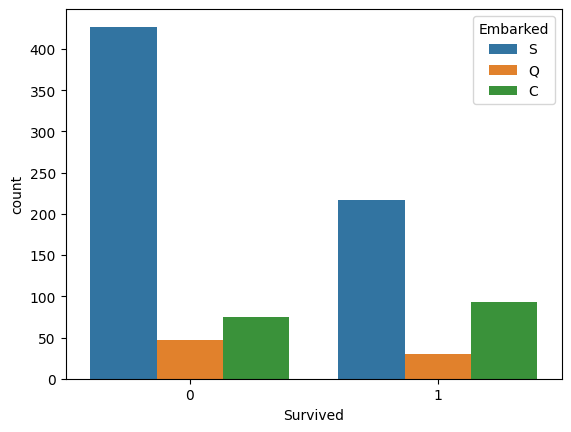

In [11]:
sb.countplot(x="Survived", data = datas, hue = "Embarked")

In [12]:
dummiesEmbarked= pd.get_dummies(datas["Embarked"], dtype = int, drop_first = True)
datas = datas.drop(["Embarked"], axis = 1)

In [13]:
datas = datas.join(dummiesEmbarked)

<Axes: >

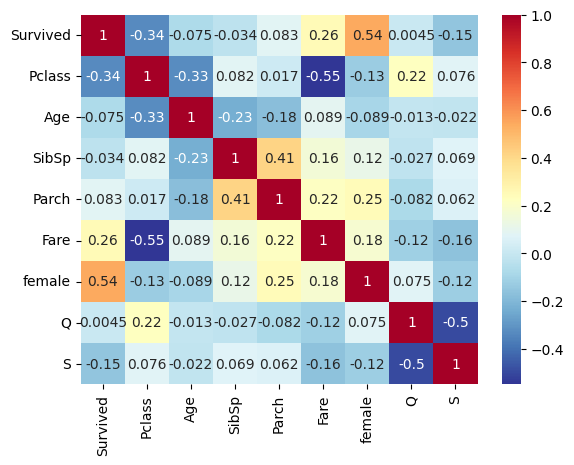

In [14]:
sb.heatmap(datas.corr(), annot = True, cmap = "RdYlBu_r")
#fare es el dinero con el que pagaron el boleto, Parch es la cantidad de padres e hijos del pasajero

In [15]:
datas.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
0,0,3,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1
3,1,1,35.0,1,0,53.1000,1,0,1
4,0,3,35.0,0,0,8.0500,0,0,1


<Axes: xlabel='Survived', ylabel='count'>

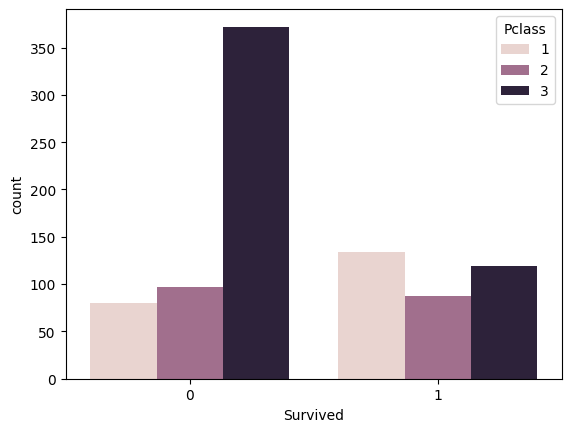

In [16]:
sb.countplot(x="Survived", data = datas, hue = "Pclass")
#De la mayoria que no sobrevivieron eran de tercera clase (los que pagaban menos)

<Axes: >

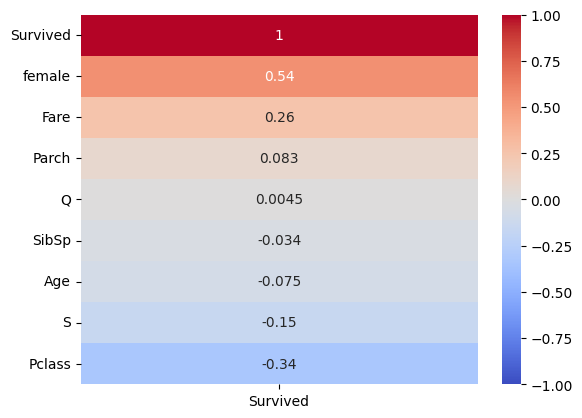

In [17]:
datasCorr =datas.corr()
sb.heatmap(datasCorr[['Survived']].sort_values(by=['Survived'],ascending=False), vmin=-1, cmap='coolwarm', annot=True)
#Codigo sacado de https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
#Muestra el peso de cada variable que influye en el haber sobrevivido

In [18]:
X = datas.drop(["Survived"],axis=1)
y = datas["Survived"]

In [19]:
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000) #da 1000 vueltas a los datos para ajustar la funcion
model.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [20]:
prediction = model.predict(X_pru)

In [21]:

accuracy_score(y_pru, prediction) #adivina el 83% de que no sobrevivio

0.8033707865168539

In [22]:
print(classification_report(y_pru, prediction))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       120
           1       0.69      0.71      0.70        58

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [23]:
confusion_matrix(y_pru, prediction)

array([[102,  18],
       [ 17,  41]])

In [24]:
pd.DataFrame(confusion_matrix(y_pru, prediction), columns = ["Pred : No", "Pred : Si"], index = ["Real : No", "Real : Si"])

#Viene con falsos positivos y falsos negativos
#[verdadero negativo -- falso positivo]
#[falso negativo -- verdadero positivo]

,Pred : No,Pred : Si
Real : No,102,18
Real : Si,17,41


https://datagy.io/python-confusion-matrix/

In [26]:
newPerson = [1, 20, 1, 1, 85, 1, 0, 0] #clase, edad, hermanos-esposa, papas-hijos, valor-de-la-entrada, mujer,Q , S
test = model.predict([newPerson])
if test[0] == 1:
  print("Sobreviviste")
else:
  print("f")

Sobreviviste


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


https://kacox.github.io/titanicml/Titanic_investigate.html REFERENCIA